# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q="bitcoin",
    language="en"
)


In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q="ethereum",
    language="en"
)

print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}")
print(f"Total articles about Bitcoin: {ethereum_articles['totalResults']}")

Total articles about Bitcoin: 4772
Total articles about Bitcoin: 1310


In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12T14:00:00Z,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03T22:00:00Z,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12T21:05:41Z,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20T20:02:17Z,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06T22:37:18Z,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [7]:
print(btc_df['text'].loc[1])

Visa has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.113005,0.055895,0.025737,0.918368
std,0.374252,0.066608,0.066192,0.100555
min,-0.670500,0.000000,0.000000,0.716000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.000000,0.050000,0.000000,0.950000
75%,0.308150,0.093000,0.000000,1.000000
max,0.765000,0.174000,0.215000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.122565,0.060950,0.021050,0.918000
std,0.320198,0.078682,0.054473,0.105304
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.876000
50%,0.000000,0.052000,0.000000,0.948000
75%,0.261275,0.095250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z ]")
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [13]:
sw_2 = " ".join(sw)
sw_2 = regex.sub('', sw_2)
sw_2 = word_tokenize(sw_2)
sw_2 = set(sw_2)
sw = sw.union(sw_2)
sw_3 = set(['char', 'reuters', 'ha'])
sw = sw.union(sw_3)

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
btc_tokens = []
for i, rows in btc_df.iterrows():
    toke = tokenizer(btc_df['text'].loc[i])
    btc_tokens.append(toke)
    
btc_df["Tokens"] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2020-11-12T14:00:00Z,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03T22:00:00Z,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12T21:05:41Z,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20T20:02:17Z,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06T22:37:18Z,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [16]:
# Create a new tokens column for Ethereum
eth_tokens = []
for i, rows in eth_df.iterrows():
    toke = tokenizer(eth_df['text'].loc[i])
    eth_tokens.append(toke)
    
eth_df["Tokens"] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, digital, currency, ethereum, xrp, soa..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, institutional, investor, pumped, m..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = {}

for n in btc_tokens:
    btc_ngrams.update(Counter(ngrams(n, n=2)))
    btc_2grams = dict((k,v) for k, v in btc_ngrams.items() if v >= 2)
        
btc_2grams
        


{}

In [19]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = {}

for n in eth_tokens:
    eth_ngrams.update(Counter(ngrams(n, n=2)))
    eth_2grams = dict((k,v) for k, v in eth_ngrams.items() if v >= 2)
        
eth_2grams

{}

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    token_list = []
    for n in tokens:
        for x in n:
            token_list.append(x)
    return Counter(token_list).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('bitcoin', 10),
 ('currency', 6),
 ('cryptocurrency', 5),
 ('photo', 5),
 ('virtual', 5),
 ('illustration', 5),
 ('taken', 5),
 ('reutersdado', 5),
 ('us', 4),
 ('november', 4)]

In [22]:
# Get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('bitcoin', 13),
 ('currency', 10),
 ('photo', 9),
 ('virtual', 9),
 ('representation', 8),
 ('illustration', 8),
 ('reutersdado', 8),
 ('seen', 7),
 ('taken', 7),
 ('cryptocurrency', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

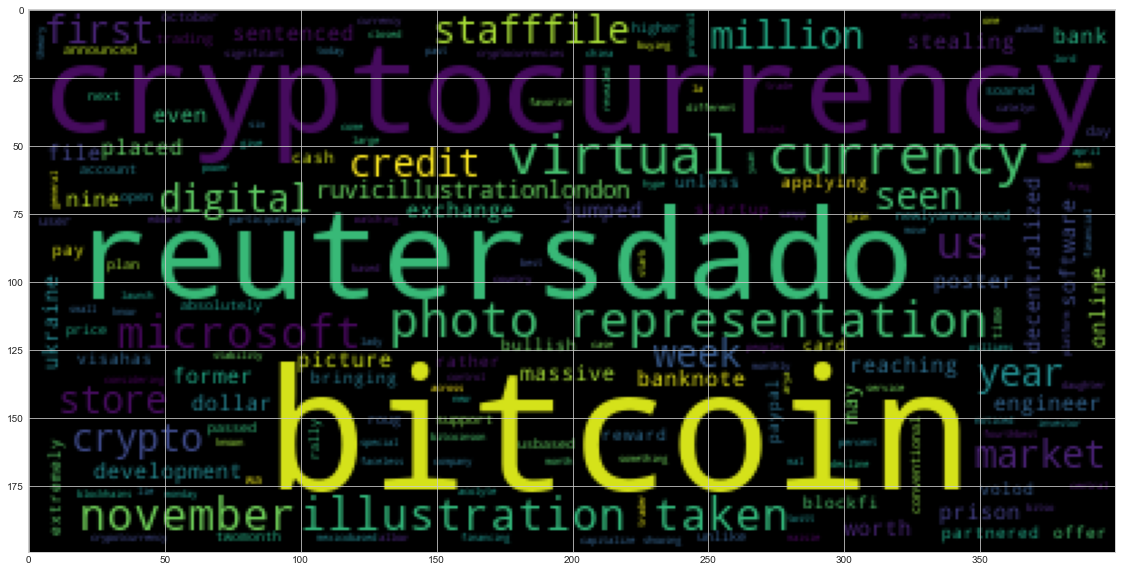

In [24]:
# Generate the Bitcoin word cloud
flat_btc_tokens = []

for n in btc_tokens:
        for x in n:
            flat_btc_tokens.append(x)

wc_btc = ' '.join(flat_btc_tokens)

wc_btc = WordCloud().generate(wc_btc)
plt.imshow(wc_btc)


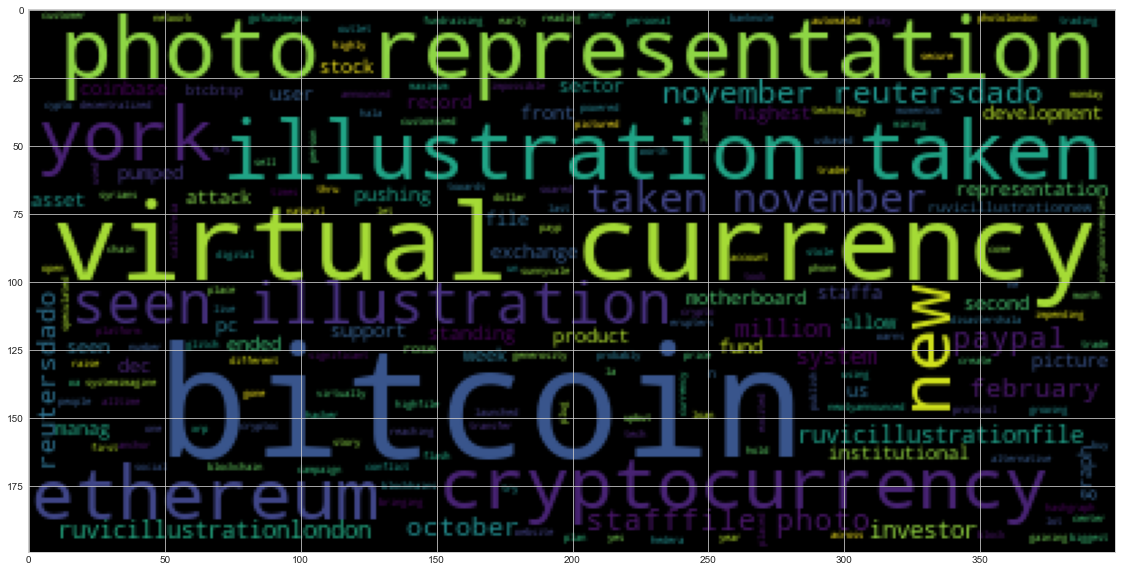

In [25]:
# Generate the Ethereum word cloud
flat_eth_tokens = []

for n in eth_tokens:
        for x in n:
            flat_eth_tokens.append(x)

wc_eth = ' '.join(flat_eth_tokens)

wc_eth = WordCloud().generate(wc_eth)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
combined_btc = ' '.join(btc_df['text'])

In [29]:
# Run the NER processor on all of the text
btc_doc = nlp(combined_btc)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin Document"


In [30]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [31]:
# List all Entities
btc_doc.ents

(Microsoft,
 Ukraine,
 nine years,
 more than $10 million,
 Microsoft,
 2016 to 2018,
 Visa,
 first,
 Bitcoin,
 PayPal,
 US,
 first,
 US,
 October,
 November 2017,
 two-month,
 Bitcoin,
 10,000,
 first,
 the next 20 days,
 19,665,
 digital yuan,
 the People’s Bank of China,
 the past few weeks,
 bitcoin,
 digital,
 hype,
 Six years,
 Mexico,
 $62 million,
 Decentralized,
 4,
 U.S.,
 November,
 today,
 500,
 10.8 percent,
 November,
 monthly,
 April,
 fourth,
 Maisie Williams,
 Arya Stark,
 Lady Catelyn,
 Eddard,
 acolyte,
 the Faceless Men,
 Monday,
 1,
 1,
 Microsoft,
 Ukraine,
 nine years,
 more than $10 million,
 Microsoft,
 8,
 7,
 Bitcoin,
 above $18,000,
 Tuesday,
 evening,
 December 2017,
 this week,
 more than $18,000,
 Bitcoin,
 March 13, 2020,
 REUTERS/,
 Tom Wilson,
 Justin HarperBusiness,
 BBC News,
 Bitcoin,
 above $17,000,
 12,800,
 three-year,
 Bitcoin,
 this week,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/Dado Ruvic/Illustration,
 Reuters,
 Bitcoin,
 Reuters,
 Bi

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
combined_eth = ' '.join(eth_df['text'])

In [33]:
# Run the NER processor on all of the text
eth_doc = nlp(combined_eth)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum Document"

In [34]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [35]:
# List all Entities
eth_doc.ents

(PayPal,
 US,
 first,
 US,
 October,
 February 3, 2018,
 REUTERS/,
 Reuters,
 February 3, 2018,
 REUTERS/,
 Reuters,
 LONDON,
 Reuters,
 XRP,
 Monday,
 NEW YORK,
 Reuters,
 $429 million,
 the week ended Dec. 7,
 second,
 NEW YORK,
 Reuters,
 $429 million,
 the week ended Dec. 7,
 second,
 PayPal,
 the Generosity Network,
 20,000,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 The New York Times,
 Coinbase,
 early February this year,
 last month,
 October,
 $24 million,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reuters,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reuters,
 Reuters,
 Bitcoin,
 U.S.,
 May 26, 2020,
 REUTERS/,
 Reuters,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 LONDON,
 Reuters,
 Bitcoin,
 Hala Systems,
 Hedera,
 Syrians,
 Hala Systems,
 Paypal,
 1,
 Bitcoin,
 Ethereum,
 bitcoin,
 Payp,
 Bitcoin,
 the Plug and Play Tech Center,
 Sunnyvale,
 California,
 October 28, 2013,
 REUTERS/Stephen La

---